In [10]:
from kite_client import get_kite_client
import datetime

kite = get_kite_client()

try:
    profile = kite.profile()
    print("✅ Logged in as:", profile["user_name"])
except Exception as e:
    print("❌ Token may be invalid or expired:", e)
    exit()

✅ Logged in as: Nikhil Prakashrao Raikar


In [17]:
instrument_token = 738561
from_date = datetime.datetime.now() - datetime.timedelta(days=5)
to_date = datetime.datetime.now()

candles = kite.historical_data(
    instrument_token=instrument_token, from_date=from_date, to_date=to_date, interval="15minute"
)
print(f"📊 Fetched {len(candles)} candles")
for c in candles:
    print(c)

📊 Fetched 75 candles
{'date': datetime.datetime(2025, 6, 18, 9, 15, tzinfo=tzoffset(None, 19800)), 'open': 1430, 'high': 1437.2, 'low': 1428, 'close': 1437, 'volume': 460886}
{'date': datetime.datetime(2025, 6, 18, 9, 30, tzinfo=tzoffset(None, 19800)), 'open': 1437, 'high': 1441.5, 'low': 1436.8, 'close': 1441.5, 'volume': 339117}
{'date': datetime.datetime(2025, 6, 18, 9, 45, tzinfo=tzoffset(None, 19800)), 'open': 1441.5, 'high': 1442.8, 'low': 1436.8, 'close': 1437, 'volume': 252507}
{'date': datetime.datetime(2025, 6, 18, 10, 0, tzinfo=tzoffset(None, 19800)), 'open': 1437, 'high': 1438.3, 'low': 1435.2, 'close': 1437.8, 'volume': 246141}
{'date': datetime.datetime(2025, 6, 18, 10, 15, tzinfo=tzoffset(None, 19800)), 'open': 1437.8, 'high': 1438.7, 'low': 1435.6, 'close': 1436, 'volume': 145148}
{'date': datetime.datetime(2025, 6, 18, 10, 30, tzinfo=tzoffset(None, 19800)), 'open': 1436.1, 'high': 1436.5, 'low': 1434, 'close': 1435.9, 'volume': 203182}
{'date': datetime.datetime(2025, 

In [18]:
import pandas as pd

data = kite.historical_data(
    instrument_token,
    from_date.strftime("%Y-%m-%d"),
    to_date.strftime("%Y-%m-%d"),
    interval="15minute",
)

df = pd.DataFrame(data)

df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)

df_45min = (
    df.resample("45min", offset="15min")
    .agg({"open": "first", "high": "max", "low": "min", "close": "last", "volume": "sum"})
    .dropna()
)

print(df_45min)

                             open    high     low   close    volume
date                                                               
2025-06-17 09:15:00+05:30  1448.0  1448.0  1432.5  1434.3   1308141
2025-06-17 10:00:00+05:30  1434.4  1436.3  1426.9  1431.0   1854790
2025-06-17 10:45:00+05:30  1431.1  1431.5  1425.8  1431.1    756693
2025-06-17 11:30:00+05:30  1431.1  1433.0  1428.3  1428.8    452070
2025-06-17 12:15:00+05:30  1428.8  1434.3  1428.6  1432.3    661793
2025-06-17 13:00:00+05:30  1432.3  1435.9  1432.0  1432.8    593249
2025-06-17 13:45:00+05:30  1432.7  1434.0  1430.0  1433.3    657210
2025-06-17 14:30:00+05:30  1433.3  1434.0  1429.2  1430.6   1819670
2025-06-17 15:15:00+05:30  1430.5  1436.0  1427.2  1430.0   2149947
2025-06-18 09:15:00+05:30  1430.0  1442.8  1428.0  1437.0   1052510
2025-06-18 10:00:00+05:30  1437.0  1438.7  1434.0  1435.9    594471
2025-06-18 10:45:00+05:30  1435.9  1436.2  1429.9  1430.7    631819
2025-06-18 11:30:00+05:30  1430.7  1432.0  1428.

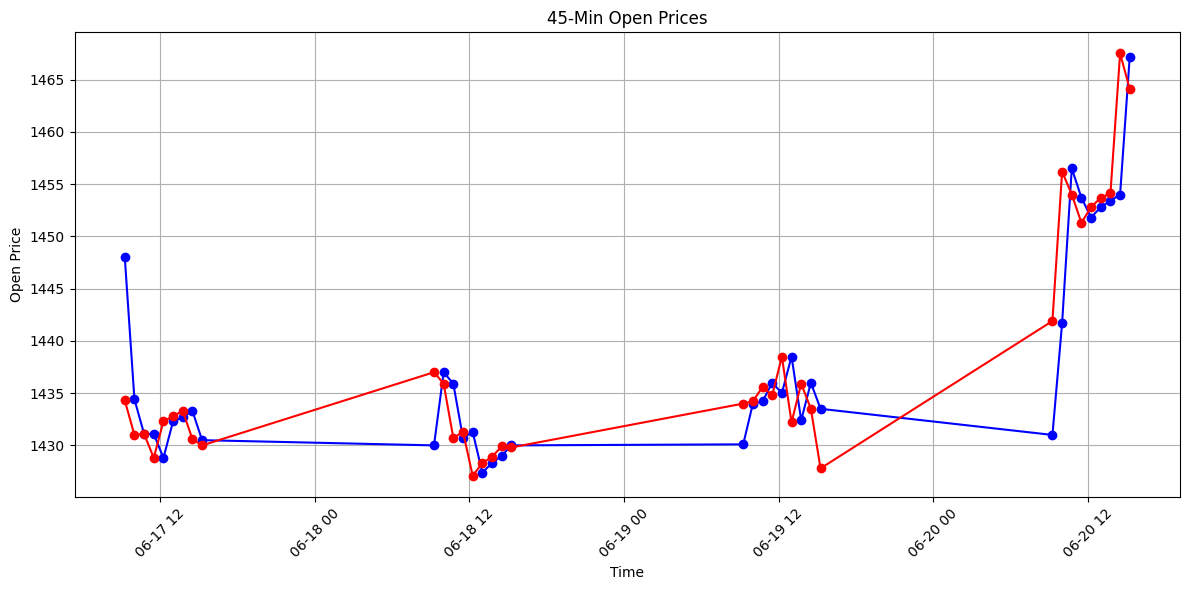

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_45min.index, df_45min["open"], marker="o", linestyle="-", color="blue")
plt.plot(df_45min.index, df_45min["close"], marker="o", linestyle="-", color="red")
plt.title("45-Min Open Prices")
plt.xlabel("Time")
plt.ylabel("Open Price")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Reversal points (Open < Close):
2025-06-17 12:15:00+05:30 - Open: 1428.8, Close: 1432.3
2025-06-17 13:00:00+05:30 - Open: 1432.3, Close: 1432.8
2025-06-17 13:45:00+05:30 - Open: 1432.7, Close: 1433.3
2025-06-18 09:15:00+05:30 - Open: 1430.0, Close: 1437.0
2025-06-18 11:30:00+05:30 - Open: 1430.7, Close: 1431.3
2025-06-18 13:00:00+05:30 - Open: 1427.4, Close: 1428.3
2025-06-18 13:45:00+05:30 - Open: 1428.3, Close: 1428.9
2025-06-18 14:30:00+05:30 - Open: 1429.0, Close: 1429.9
2025-06-19 09:15:00+05:30 - Open: 1430.1, Close: 1434.0
2025-06-19 10:00:00+05:30 - Open: 1434.0, Close: 1434.2
2025-06-19 10:45:00+05:30 - Open: 1434.2, Close: 1435.6
2025-06-19 12:15:00+05:30 - Open: 1435.0, Close: 1438.5
2025-06-19 13:45:00+05:30 - Open: 1432.4, Close: 1435.9
2025-06-20 09:15:00+05:30 - Open: 1431.0, Close: 1441.9
2025-06-20 10:00:00+05:30 - Open: 1441.7, Close: 1456.2
2025-06-20 12:15:00+05:30 - Open: 1451.8, Close: 1452.8
2025-06-20 13:00:00+05:30 - Open: 1452.8, Close: 1453.7
2025-06-20 13:45

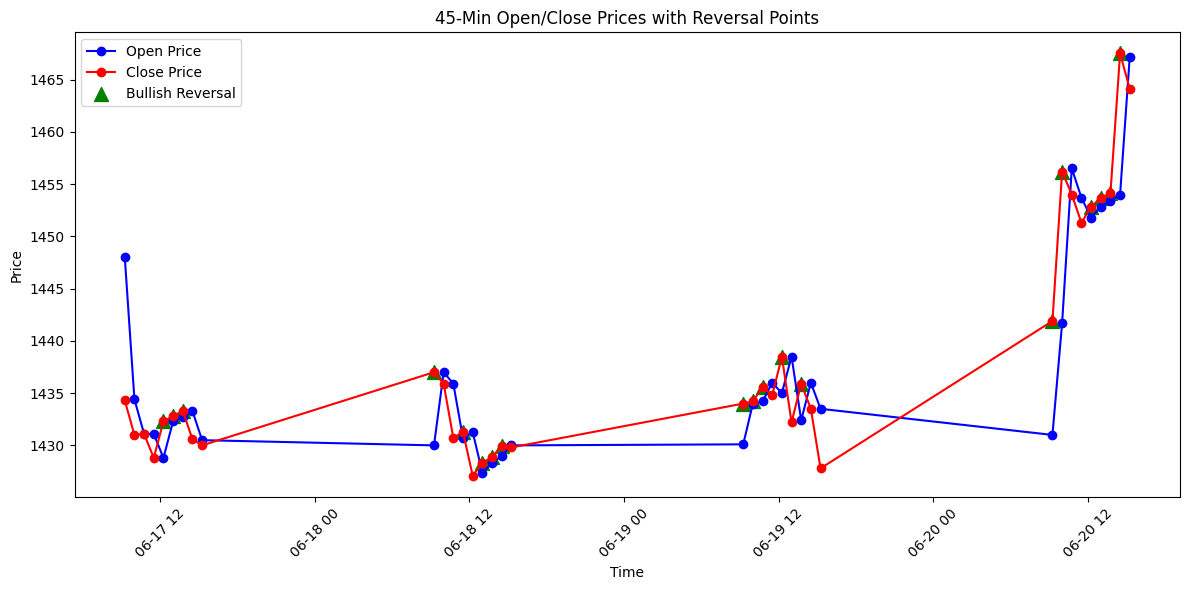

In [24]:
# Detect reversal points (open < close)
reversals = df_45min[df_45min["open"] < df_45min["close"]]

# Print reversal timestamps
print("Reversal points (Open < Close):")
for timestamp, row in reversals.iterrows():
    print(f"{timestamp} - Open: {row['open']}, Close: {row['close']}")

# Plot Open and Close prices
plt.figure(figsize=(12, 6))
plt.plot(
    df_45min.index, df_45min["open"], marker="o", linestyle="-", color="blue", label="Open Price"
)
plt.plot(
    df_45min.index, df_45min["close"], marker="o", linestyle="-", color="red", label="Close Price"
)

# Highlight reversal points
plt.scatter(
    reversals.index, reversals["close"], color="green", label="Bullish Reversal", s=100, marker="^"
)

plt.title("45-Min Open/Close Prices with Reversal Points")
plt.xlabel("Time")
plt.ylabel("Price")
plt.grid(False)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()